# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Agil Mughni
- **Email:** agilmughni1@gmail.com
- **ID Dicoding:** agil_mughni

## Menentukan Pertanyaan Bisnis

- Bagaimana pola permintaan penyewaan sepeda berdasarkan jam?
- Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?
- Bagaimana perbedaan pola penggunaan antara hari kerja dan akhir pekan?
- Bagaimana perbedaan pola penggunaan antara pelanggan kasual dan pelanggan terdaftar?
- Bagaimana hari libur mempengaruhi tingkat penyewaan sepeda?
- Kapan terjadi lonjakan permintaan yang signifikan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

Pada tahap ini, dilakukan pengumpulan semua data yang dibutuhkan dan memuat semua data tersebut ke dalam dataframe menggunakan library pandas

In [2]:
# Membaca dataset
day_df = pd.read_csv("data/day.csv")
# Menampilkan awalan baris data dari dataframe (default 5 baris)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Membaca dataset
hour_df = pd.read_csv("data/hour.csv")
# Menampilkan awalan baris data dari dataframe (default 5 baris)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset telah berhasil di muat dengan dataframe menggunakan library pandas
- Menampilkan 5 baris pertama dari masing-masing dataframe dengan method head()

### Assessing Data

In [4]:
# Melihat info dari dataframe
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat dilihat bahwa tidak terdapat missing value pada day_df dataframe karena semua jumlah data pada kolom dari fitur memiliki nilai yang sama dengan jumlah baris data yakni 731. Namun jika diperhatikan lebih detil, terdapat masalah dengan tipe data pada kolom **dteday** yang seharusnya bukan bertipe object melainkan **datetime**. Hal ini akan ditangani pada tahap cleaning data nantinya.

In [5]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


Berdasarkan hasil yang didapat, diketahui tidak tedapat data yang terduplikat sehingga dapat dilanjutkan dengan proses assesing berikutnya

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan hasil dari ringkasan parameter statistik, tidak ditemukan keanehan atau anomali dalam dataframe tersebut.

In [7]:
print(day_df['holiday'].unique())

[0 1]


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dapat dilihat bahwa tidak terdapat missing value pada hour_df dataframe karena semua jumlah data pada kolom dari fitur memiliki nilai yang sama dengan jumlah baris data yakni 17379. Namun jika diperhatikan lebih detil, terdapat masalah yang sama juga dengan day_df yaitu tipe data pada kolom **dteday** yang seharusnya bukan bertipe object melainkan **datetime**. Hal ini akan ditangani pada tahap cleaning data nantinya.

In [9]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


Berdasarkan hasil yang didapat, diketahui tidak tedapat data yang terduplikat sehingga dapat dilanjutkan dengan proses assesing berikutnya

In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan hasil dari ringkasan parameter statistik, tidak ditemukan keanehan atau anomali dalam dataframe tersebut.

**Insight:**
- Kolom instant dapat dihapus karena hanya berupa record index dari setiap baris data.
- Dataframe day_df dan hour_df memiliki kesalahan tipe data pada kolum dteday dengan tipe data yang tepatnya yaitu datetime. Hal ini akan ditangani pada tahap cleaning data.
- Keduanya sama-sama tidak memiliki missing value dan data yang terduplikat.

### Cleaning Data

In [11]:
# Menghapus kolom instant
day_df.drop(columns='instant', inplace=True)
hour_df.drop(columns='instant', inplace=True)

In [12]:
# Mengubah tipe data pada kolom dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print(day_df.dtypes)

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [13]:
# Mengubah tipe data pada kolom dteday menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
print(hour_df.dtypes)

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


**Insight:**
- Menghapus kolom instant karena hanya merepresentasikan nilai index sehingga tidak terlalu penting dalam proses analisis.
- Kedua dataframe day_df dan hour_df telah memiliki dataframe yang telah bersih sehingga siap untuk dianalis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [14]:
day_df.describe(include='all')

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [15]:
day_df.groupby(['mnth', 'season'])['cnt'].agg(['mean', 'min', 'max'])

mean   min   max
mnth season                         
1    1       2176.338710   431  4521
2    1       2655.298246  1005  5062
3    1       3551.625000   605  7836
     2       3947.954545  1536  8362
4    2       4484.900000   795  7460
5    2       5349.774194  2633  8294
6    2       5773.850000  3767  8120
     3       5769.400000  4507  7458
7    3       5563.677419  3285  8173
8    3       5664.419355  1115  7865
9    3       5672.704545  1842  8714
     4       6024.500000  2395  8555
10   4       5199.225806    22  8156
11   4       4247.183333  1495  6852
12   1       1954.454545   441  3623
     4       4200.950000   705  6606

In [16]:
day_df.groupby('weekday')['cnt'].agg(['mean', 'min', 'max'])

,mean,min,max
weekday,,,
0,4228.828571,605,8227
1,4338.123810,22,7525
2,4510.663462,683,7767
3,4548.538462,441,8173
4,4667.259615,431,7804
5,4690.288462,1167,8362
6,4550.542857,627,8714


In [17]:
hour_df.groupby('hr')['cnt'].agg(['mean', 'min', 'max'])

,mean,min,max
hr,,,
0,53.898072,2,283
1,33.375691,1,168
2,22.869930,1,132
3,11.727403,1,79
4,6.352941,1,28
5,19.889819,1,66
6,76.044138,1,213
7,212.064649,1,596
8,359.011004,5,839


In [18]:
day_df.groupby('weathersit')['cnt'].agg(['mean', 'min', 'max'])

,mean,min,max
weathersit,,,
1,4876.786177,431,8714
2,4035.862348,605,8362
3,1803.285714,22,4639


In [19]:
day_df.groupby('holiday')['cnt'].agg(['mean', 'min', 'max'])

,mean,min,max
holiday,,,
0,4527.104225,22,8714
1,3735.000000,1000,7403


In [20]:
day_df.groupby('workingday')['cnt'].agg(['mean', 'min', 'max'])

,mean,min,max
workingday,,,
0,4330.168831,605,8714
1,4584.820000,22,8362


In [21]:
hour_df.groupby('hr')[['casual', 'registered']].mean()

,casual,registered
hr,,
0,10.158402,43.739669
1,6.504144,26.871547
2,4.772028,18.097902
3,2.715925,9.011478
4,1.253945,5.098996
5,1.411437,18.478382
6,4.161379,71.882759
7,11.055021,201.009629
8,21.679505,337.331499


**Insight:**
- Jumlah peminjaman sepeda terendah terjadi pada bulan Januari (mnth=1) dengan rata-rata 2.176 peminjaman per hari.
- Peminjaman meningkat signifikan dari Januari ke bulan-bulan berikutnya, mencapai puncaknya pada musim gugur (Juni, Juli, Agustus), dengan rata-rata di atas 5.500 peminjaman per hari.
- Secara umum, jumlah peminjaman cenderung lebih tinggi pada akhir pekan (Sabtu dan Jumat), sedangkan awal minggu memiliki jumlah peminjaman yang lebih rendah.
- Jam Sibuk (08:00 dan 17:00) memiliki angka peminjaman maksimum tertinggi, dengan lebih dari 900 peminjaman dalam satu jam.
- Cuaca cerah memiliki rata-rata peminjaman yang lebih tinggi (4.876 sepeda per hari) dengan maksimum 8.714 peminjaman per hari.
- Hari kerja memiliki lebih banyak peminjaman sepeda dibanding hari libur, kemungkinan besar karena digunakan untuk perjalanan kerja atau sekolah. Namun, permintaan di hari libur lebih stabil.
- Peminjaman sepeda lebih banyak pada hari kerja, mengindikasikan bahwa sepeda digunakan sebagai transportasi harian. Namun, hari non-kerja memiliki puncak peminjaman tertinggi, menunjukkan ada potensi pasar untuk aktivitas rekreasi dan wisata.
- Pengguna registered mendominasi peminjaman sepeda, terutama pada jam commuting (pagi & sore). Pengguna casual lebih banyak menggunakan sepeda di siang hari kemungkinan untuk rekreasi atau perjalanan santai.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola permintaan penyewaan sepeda berdasarkan jam?

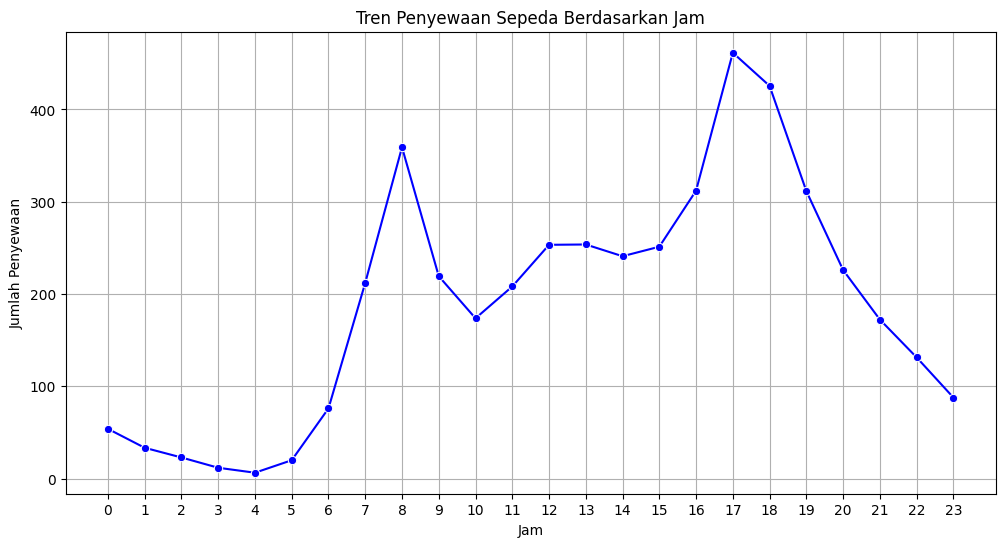

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df.groupby('hr')['cnt'].mean(), marker='o', color='b')
plt.title('Tren Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Pertanyaan 2: Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?

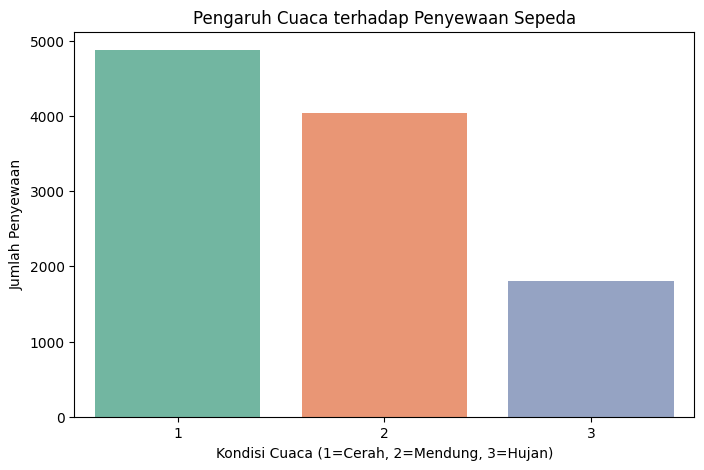

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=day_df, hue='weathersit', palette='Set2', errorbar=None, legend=False)
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca (1=Cerah, 2=Mendung, 3=Hujan)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 3: Bagaimana perbedaan pola penggunaan antara hari kerja dan akhir pekan?

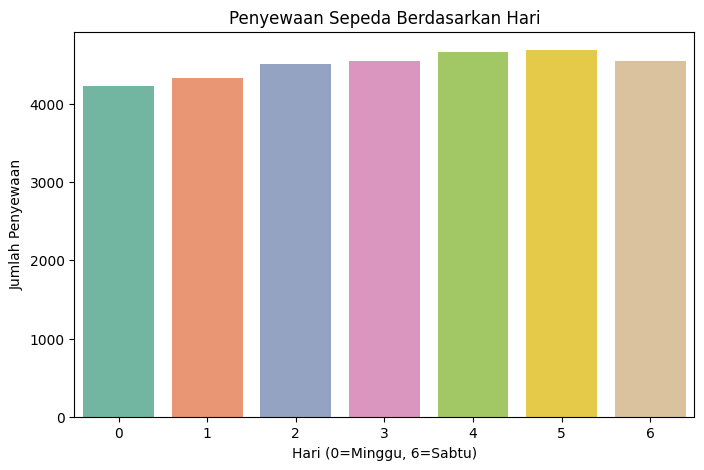

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weekday', y='cnt', data=day_df, hue='weekday', palette='Set2', errorbar=None, legend=False)
plt.title('Penyewaan Sepeda Berdasarkan Hari')
plt.xlabel('Hari (0=Minggu, 6=Sabtu)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 4: Bagaimana perbedaan pola penggunaan antara pelanggan kasual dan pelanggan terdaftar?

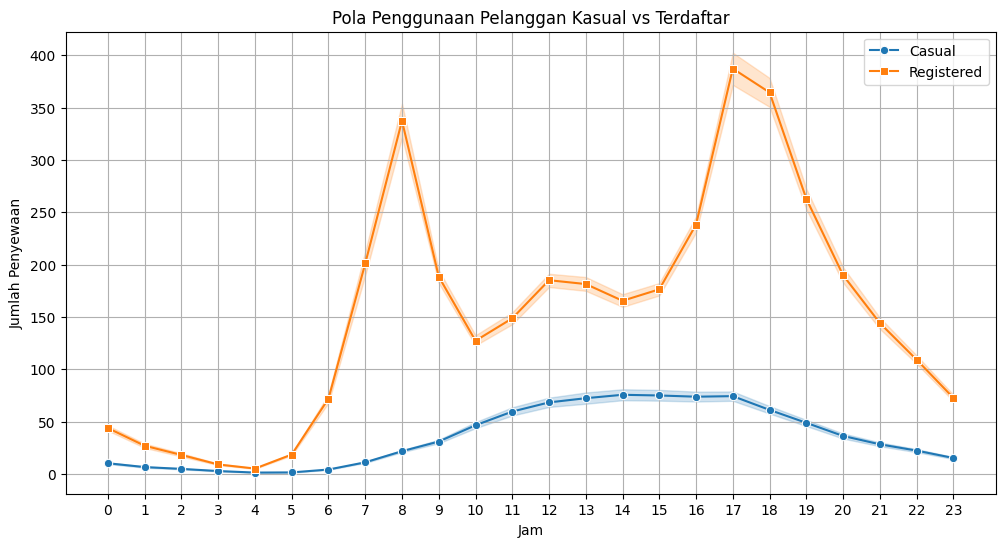

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='casual', data=hour_df, label='Casual', marker='o')
sns.lineplot(x='hr', y='registered', data=hour_df, label='Registered', marker='s')
plt.title('Pola Penggunaan Pelanggan Kasual vs Terdaftar')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.legend()
plt.grid()
plt.show()

### Pertanyaan 5: Bagaimana hari libur mempengaruhi tingkat penyewaan sepeda?

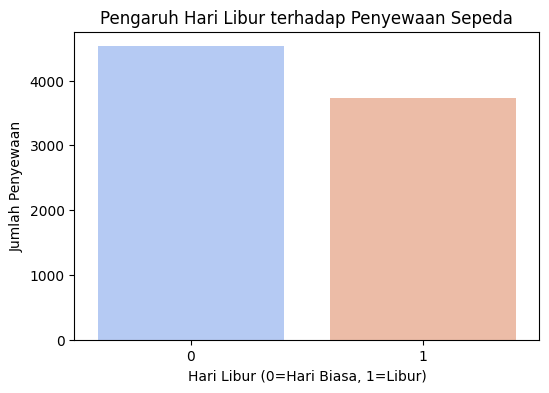

In [26]:
plt.figure(figsize=(6, 4))
sns.barplot(x='holiday', y='cnt', data=day_df, hue='holiday', palette='coolwarm', errorbar=None, legend=False)
plt.title('Pengaruh Hari Libur terhadap Penyewaan Sepeda')
plt.xlabel('Hari Libur (0=Hari Biasa, 1=Libur)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 6: Kapan terjadi lonjakan permintaan yang signifikan?

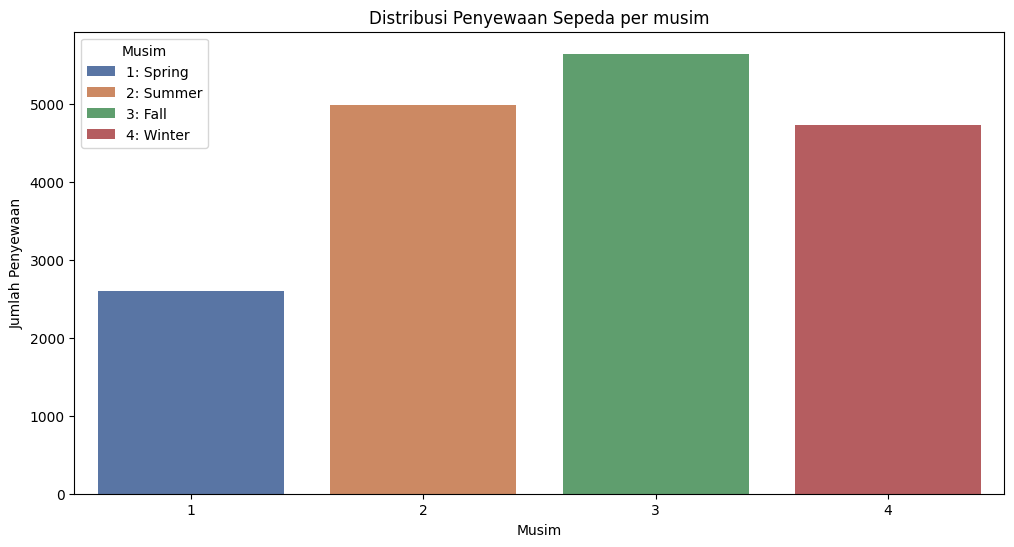

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='cnt', data=day_df, hue='season', palette='deep', errorbar=None, legend=True)
plt.title('Distribusi Penyewaan Sepeda per musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
season_labels = {1: '1: Spring', 2: '2: Summer', 3: '3: Fall', 4: '4: Winter'}
plt.legend(season_labels.values(), title="Musim")
plt.xticks(range(0, 4))
plt.show()

**Insight:**

1. Analisis Pola Permintaan Penyewaan Sepeda berdasarkan Waktu
    - Terlihat bahwa permintaan sepeda meningkat secara signifikan pada pukul 07:00-09:00 dan 17:00-19:00.
    - Ini menunjukkan pola aktivitas pengguna, kemungkinan besar terkait dengan jam pergi dan pulang kerja/sekolah.
    - Pada malam hari dan dini hari (00:00-05:00), jumlah penyewaan sangat rendah karena waktu tersebut bukan jam aktif
      
    ---
   
2. Analisis Pengaruh Cuaca terhadap Penyewaan Sepeda
    - Pada kondisi cuaca cerah, jumlah rata-rata penyewaan sepeda mendekati 5000. Ini menunjukkan bahwa pengguna lebih cenderung menyewa sepeda saat cuaca baik.
    - Penyewaan sepeda pada cuaca mendung mengalami sedikit penurunan dibandingkan cuaca cerah, dengan jumlah rata-rata sekitar 4000.
    - Pada kondisi hujan, jumlah penyewaan sepeda menurun drastis hingga di bawah 2000. Ini menunjukkan bahwa hujan adalah faktor besar yang menghambat pengguna dalam menyewa sepeda, kemungkinan karena kondisi jalan yang licin dan kenyamanan berkendara yang berkurang.

    ---

   
3. Analisis Perbedaan Pola Penggunaan antara Hari Kerja dan Akhir Pekan

    - Tidak ada perbedaan mencolok dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan. Secara umum, jumlah penyewaan berkisar antara 4200 hingga 4600 per hari.
    - Kamis dan Jumat memiliki jumlah penyewaan sepeda yang sedikit lebih tinggi dibandingkan hari-hari lainnya.
    - Penyewaan sepeda pada hari Minggu sedikit lebih rendah dibandingkan dengan hari-hari lainnya. Ini bisa mengindikasikan bahwa penggunaan sepeda pada hari Minggu lebih bersifat rekreasional dibandingkan dengan hari-hari kerja, sehingga tidak sebanyak hari-hari sibuk.
      
    ---

4. Analisis Perbedaan Pola Penggunaan antara Pelanggan Kasual dan Terdaftar

    - Pelanggan terdaftar memiliki dua puncak utama pada pukul 07:00-09:00 dan 17:00-19:00, yang mengindikasikan penggunaan untuk perjalanan kerja/sekolah.
    - Pelanggan kasual cenderung menyewa sepeda sepanjang siang hingga sore hari, dengan puncak kecil pada pukul 12:00-17:00.
    - Pengguna terdaftar lebih banyak menyewa pada jam sibuk, sementara pengguna kasual lebih aktif di luar jam kerja.

    ---

5. Analisis Pengaruh Hari Libur terhadap Penyewaan Sepeda

    - Rata-rata jumlah penyewaan pada hari biasa lebih tinggi dibandingkan pada hari libur. Ini menunjukkan bahwa sebagian besar pengguna sepeda memanfaatkannya sebagai alat transportasi utama, bukan hanya untuk rekreasi.
    - Pada hari libur, jumlah penyewaan sepeda lebih rendah. Ini mungkin disebabkan oleh beberapa faktor seperti pelanggan terdaftar tidak bekerja/sekolah, sehingga tidak membutuhkan sepeda untuk transportasi atau lebih sedikit aktivitas rutin, sehingga orang lebih memilih beristirahat atau menggunakan transportasi lain.
      
   ---

6. Analisis Lonjakan Permintaan Penyewaan Sepeda

    - Musim gugur memiliki jumlah penyewaan tertinggi dibandingkan musim lainnya. Kemungkinan alasan karena cuaca yang nyaman (tidak terlalu panas atau dingin) dan kondisi jalan yang lebih baik dibandingkan musim dingin.
    - Jumlah penyewaan di musim panas hampir setara dengan musim gugur. Faktor penyebab kemungkinan karena liburan musim panas sehingga orang lebih banyak melakukan aktivitas luar ruangan, termasuk bersepeda dan kondisi cuaca cerah dan stabil, meskipun bisa lebih panas.
    - Jumlah penyewaan di musim winter lebih rendah dibandingkan musim panas dan gugur, tetapi masih lebih tinggi dari musim semi.
    - Penyewaan sepeda paling sedikit terjadi di musim semi. Kemungkinan penyebab karena cuaca yang masih tidak stabil, dengan kemungkinan hujan lebih tinggi dan transisi dari musim dingin, di mana orang mungkin masih beradaptasi sebelum kembali rutin bersepeda.

## Analisis Lanjutan (Opsional)

In [34]:
# Konversi tanggal ke format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# RFM Analysis menggunakan hari sebagai unit analisis
rfm_df = day_df.groupby('dteday').agg(
    Recency=('dteday', lambda x: (day_df['dteday'].max() - x.max()).days),
    Frequency=('cnt', 'sum'),  # Menggunakan sum agar tidak terjadi duplikasi nilai yang sama
    Monetary=('cnt', 'sum')
).reset_index()

# Menangani potensi duplikasi nilai pada qcut
rfm_df['Frequency'] = rfm_df['Frequency'] + 1e-5  # Menambahkan nilai kecil agar nilai unik
rfm_df['Monetary'] = rfm_df['Monetary'] + 1e-5  # Mencegah error akibat nilai identik

# Normalisasi data RFM
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfm_df[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Clustering manual berdasarkan kuantil
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], 4, labels=[1, 2, 3, 4])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4])

# Menentukan total RFM Score
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(int) + rfm_df['F_Score'].astype(int) + rfm_df['M_Score'].astype(int)

# Segmentasi berdasarkan RFM Score
def segment_customer(score):
    if score >= 10:
        return 'Best Customers'
    elif score >= 7:
        return 'Loyal Customers'
    elif score >= 5:
        return 'Potential Customers'
    else:
        return 'At Risk'

rfm_df['Segment'] = rfm_df['RFM_Score'].apply(segment_customer)

rfm_df.to_csv('data/rfm_analysis.csv', index=False)

# Menampilkan hasil clustering manual
rfm_df[['dteday', 'RFM_Score', 'Segment']]

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,dteday,RFM_Score,Segment
0,2011-01-01,3,At Risk
1,2011-01-02,3,At Risk
2,2011-01-03,3,At Risk
3,2011-01-04,3,At Risk
4,2011-01-05,3,At Risk
...,...,...,...
726,2012-12-27,6,Potential Customers
727,2012-12-28,6,Potential Customers
728,2012-12-29,6,Potential Customers
729,2012-12-30,6,Potential Customers


#### Teknik RFM ini diterapkan untuk mengelompokkan hari-hari berdasarkan pola penggunaan sepeda dengan tiga metrik utama:
- Recency (R) – Seberapa baru transaksi terakhir terjadi (dalam hal ini, seberapa lama hari tersebut dari tanggal terbaru dalam dataset). Hari yang lebih baru dalam penyewaan akan memiliki nilai Recency rendah (lebih segar), sedangkan hari yang sudah lama berlalu akan memiliki nilai Recency tinggi (kurang segar).Hal ini bertujuan untuk menilai seberapa sering sepeda masih digunakan hingga waktu terakhir yang tersedia dalam dataset.
- Frequency (F) – Seberapa sering transaksi terjadi dalam satu hari tertentu (jumlah peminjaman). Hari dengan banyak transaksi memiliki nilai Frequency tinggi, sedangkan hari dengan sedikit transaksi memiliki nilai Frequency rendah. Hal ini bertujuan untuk mengidentifikasi hari-hari yang memiliki aktivitas penyewaan tinggi.
- Monetary (M) – Total volume penyewaan sepeda dalam sehari. Hari dengan jumlah total penyewaan tinggi memiliki nilai Monetary tinggi. Hal ini bertujuan untuk menentukan hari dengan kontribusi besar terhadap bisnis penyewaan.

#### Proses yang Diterapkan dalam Kode
1. Mengelompokkan data berdasarkan tanggal (dteday) untuk menghitung Recency, Frequency, dan Monetary.
2. Melakukan normalisasi agar nilai RFM berada dalam rentang yang seragam menggunakan MinMaxScaler dari sklearn.
3. Melakukan clustering manual dengan teknik quartile binning (qcut) untuk membagi nilai RFM menjadi empat kategori:
   - Recency (R_Score): Skala 1-4 (Semakin kecil semakin baik).
   - Frequency (F_Score): Skala 1-4 (Semakin besar semakin baik).
   - Monetary (M_Score): Skala 1-4 (Semakin besar semakin baik).
5. Menentukan skor total RFM (RFM_Score), yang merupakan jumlah dari ketiga skor tersebut.
6. Segmentasi manual berdasarkan skor RFM:
    - Best Customers (Skor RFM ≥ 10): Hari dengan penyewaan tinggi dan sering.
    - Loyal Customers (Skor RFM 7-9): Hari dengan penyewaan stabil dan sering.
    - Potential Customers (Skor RFM 5-6): Hari dengan potensi penyewaan lebih tinggi jika dioptimalkan.
    - At Risk (Skor RFM < 5): Hari dengan penyewaan rendah atau tidak stabil.

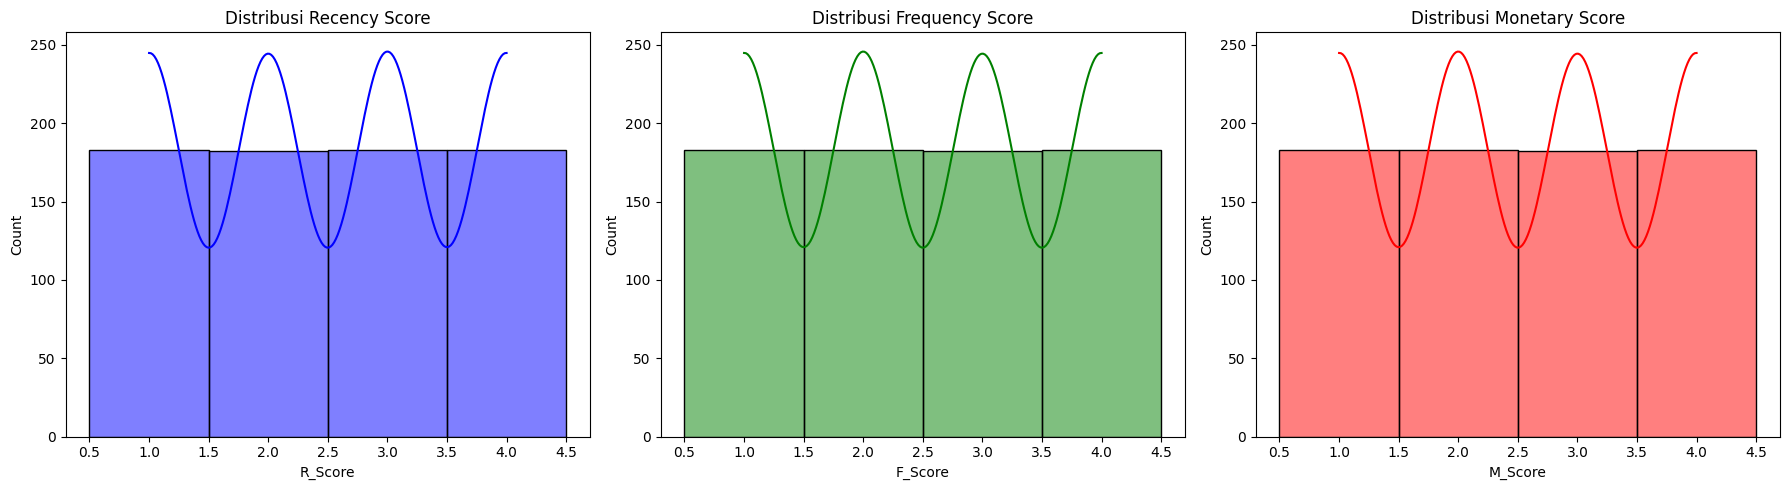

In [29]:
# Plot Distribusi R, F, M Scores
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm_df['R_Score'], bins=4, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribusi Recency Score')

sns.histplot(rfm_df['F_Score'], bins=4, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribusi Frequency Score')

sns.histplot(rfm_df['M_Score'], bins=4, kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribusi Monetary Score')

plt.tight_layout()
plt.show()

#### Histogram ini bertujuan untuk menunjukkan distribusi skor Recency, Frequency, dan Monetary untuk melihat sebaran pengguna.

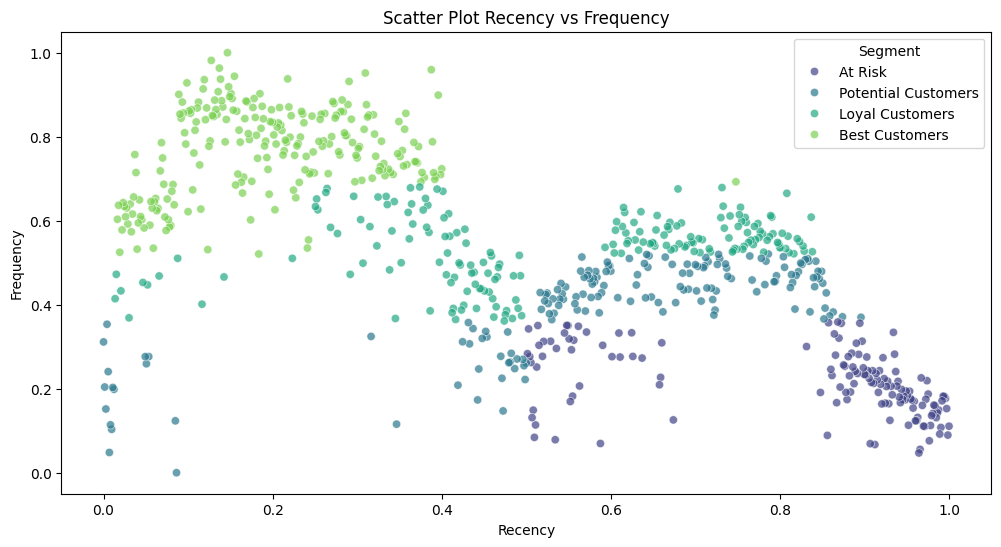

In [30]:
# Scatter plot hubungan antar komponen RFM
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency', hue='Segment', palette='viridis', alpha=0.7)
plt.title('Scatter Plot Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Segment')
plt.show()

#### Scatter plot ini bertujuan untuk memvisualisasikan hubungan antara seberapa baru transaksi terjadi dengan seberapa sering pengguna menyewa sepeda.

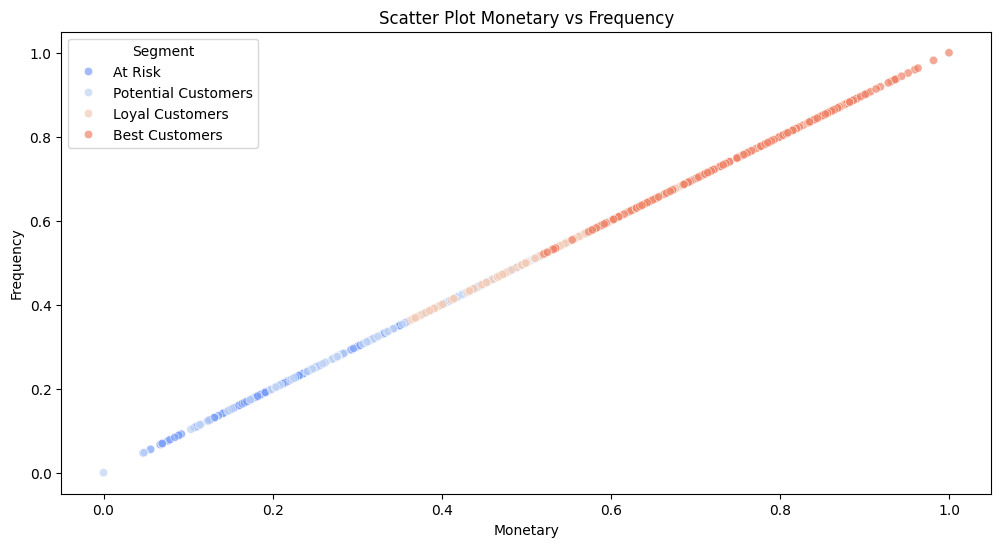

In [31]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rfm_df, x='Monetary', y='Frequency', hue='Segment', palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot Monetary vs Frequency')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.legend(title='Segment')
plt.show()

#### Scatter plot ini bertujuan untuk memeriksa apakah pelanggan yang sering menyewa juga menghasilkan revenue lebih tinggi.

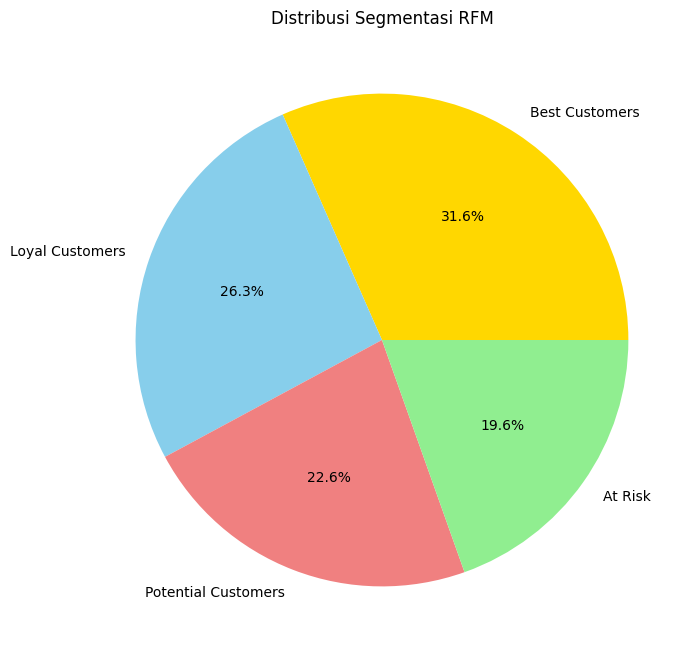

In [32]:
# Pie Chart Segmentasi RFM
plt.figure(figsize=(8, 8))
rfm_df['Segment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['gold', 'skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribusi Segmentasi RFM')
plt.ylabel('')
plt.show()

#### Piechart ini bertujuan untuk menunjukkan proporsi masing-masing segmen hasil clustering RFM.

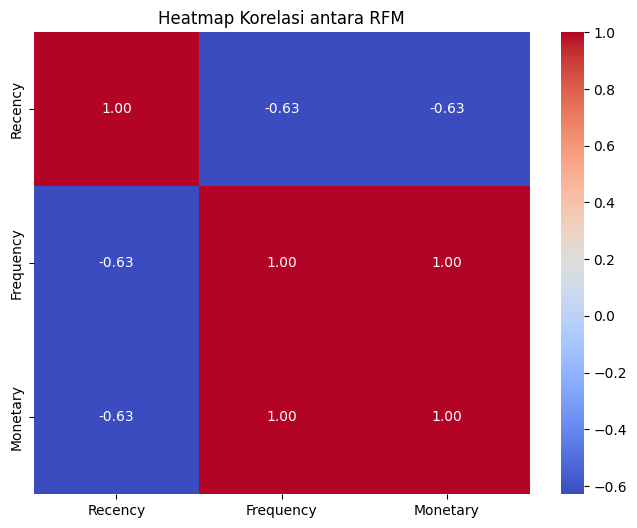

In [33]:
# Heatmap Korelasi antara R, F, dan M
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_df[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antara RFM')
plt.show()

#### Heatmap ini bertujuan untuk menganalisis apakah ada hubungan antara Recency, Frequency, dan Monetary.

## Conclusion

- **1. Bagaimana pola permintaan penyewaan sepeda berdasarkan jam?**  
    - Permintaan penyewaan sepeda **meningkat signifikan** pada pukul **07:00-09:00** dan **17:00-19:00**, yang menunjukkan bahwa sepeda digunakan sebagai alat transportasi utama saat pergi dan pulang kerja/sekolah.
    - Pada malam hari dan dini hari (00:00-05:00), **jumlah penyewaan sangat rendah** karena bukan jam aktif.
      
    ---
- **2. Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?**
    - **Cuaca cerah** → Penyewaan tinggi (rata-rata mendekati 5000).
    - **Cuaca mendung** → Penyewaan sedikit menurun (~4000).
    - **Cuaca hujan** → Penyewaan **turun drastis di bawah 2000**, menunjukkan hujan adalah faktor besar yang menghambat penyewaan karena kondisi jalan yang licin dan kurang nyaman.  

    ---
- **3. Bagaimana perbedaan pola penggunaan antara hari kerja dan akhir pekan?**  
    - Tidak ada perbedaan signifikan, tetapi **Kamis dan Jumat memiliki penyewaan sedikit lebih tinggi** dibandingkan hari lain.
    - **Hari Minggu memiliki penyewaan lebih rendah**, yang mengindikasikan bahwa penggunaan sepeda lebih bersifat rekreasional pada akhir pekan.  

    ---
- **4. Bagaimana perbedaan pola penggunaan antara pelanggan kasual dan pelanggan terdaftar?**  
    - **Pelanggan terdaftar** memiliki **dua puncak utama (07:00-09:00 dan 17:00-19:00)**, menunjukkan penggunaan untuk **transportasi kerja/sekolah**.
    - **Pelanggan kasual** cenderung menyewa **pada siang hingga sore hari (12:00-17:00)**, menunjukkan mereka lebih banyak menggunakan sepeda untuk **rekreasi dan aktivitas santai**.  

    ---
- **5. Bagaimana hari libur mempengaruhi tingkat penyewaan sepeda?**  
    - **Hari biasa memiliki jumlah penyewaan lebih tinggi dibandingkan hari libur**, menunjukkan bahwa sepeda lebih sering digunakan sebagai alat transportasi harian.
    - **Hari libur mengalami penurunan penyewaan**, kemungkinan karena pengguna terdaftar tidak bekerja/sekolah atau memilih transportasi lain.

    ---
- **6. Kapan terjadi lonjakan permintaan yang signifikan?**  
    - **Musim Gugur memiliki penyewaan tertinggi**, kemungkinan karena cuaca nyaman dan kondisi jalan yang baik.
    - **Musim Panas juga memiliki penyewaan tinggi**, didorong oleh aktivitas luar ruangan saat liburan.
    - **Musim Dingin mengalami penurunan**, tetapi tetap lebih tinggi dibandingkan Musim Semi.
    - **Musim Semi memiliki penyewaan terendah**, kemungkinan karena cuaca tidak stabil dan transisi dari musim dingin.  